<a href="https://colab.research.google.com/github/avtar123/Forecasting-Mini-Course-Sales/blob/main/Forecasting_Mini_Course_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import copy

In [ ]:
train= pd.read_csv('/content/drive/MyDrive/Forecasting_Mini_Course_Sales/train.csv')
test= pd.read_csv('/content/drive/MyDrive/Forecasting_Mini_Course_Sales/test.csv')

In [ ]:
train.head(25)

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49
5,5,2017-01-01,Argentina,Kaggle Store,Using LLMs to Improve Your Coding,88
6,6,2017-01-01,Argentina,Kaggle Store,Using LLMs to Train More LLMs,98
7,7,2017-01-01,Argentina,Kaggle Store,Using LLMs to Win Friends and Influence People,14
8,8,2017-01-01,Argentina,Kaggle Store,Using LLMs to Win More Kaggle Competitions,83
9,9,2017-01-01,Argentina,Kaggle Store,Using LLMs to Write Better,69


In [ ]:
train.describe()

,id,num_sold
count,136950.00000,136950.000000
mean,68474.50000,165.522636
std,39534.20402,183.691575
min,0.00000,2.000000
25%,34237.25000,46.000000
50%,68474.50000,98.000000
75%,102711.75000,184.000000
max,136949.00000,1380.000000


In [ ]:
test.describe()

,id
count,27375.000000
mean,150637.000000
std,7902.626146
min,136950.000000
25%,143793.500000
50%,150637.000000
75%,157480.500000
max,164324.000000


In [ ]:
pd.isnull(train).sum()

id          0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

<ipython-input-156-0e17965868d0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap=sns.heatmap(train.corr(),center=0, cmap='BrBG', annot=True)


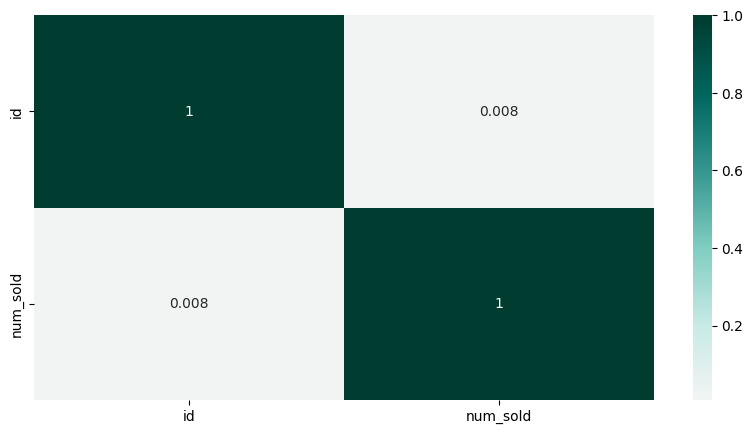

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
heatmap=sns.heatmap(train.corr(),center=0, cmap='BrBG', annot=True)

In [ ]:
train_d=copy.deepcopy(train)
test_d=copy.deepcopy(test)

In [ ]:
li=['id','date']

In [ ]:
train_d.drop(li,axis=1,inplace=True)
test_d.drop(li,axis=1,inplace=True)

In [ ]:
train_d.columns

Index(['country', 'store', 'product', 'num_sold'], dtype='object')

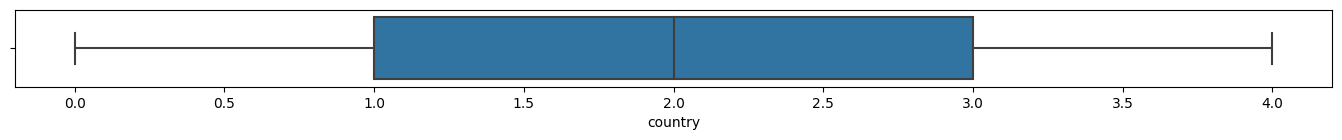

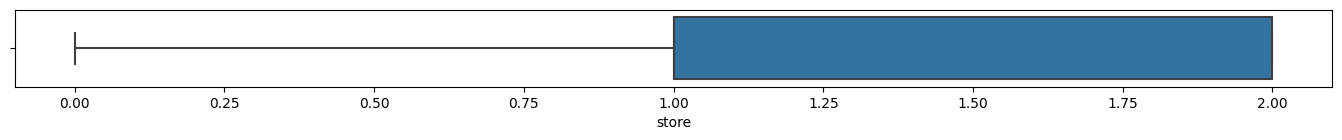

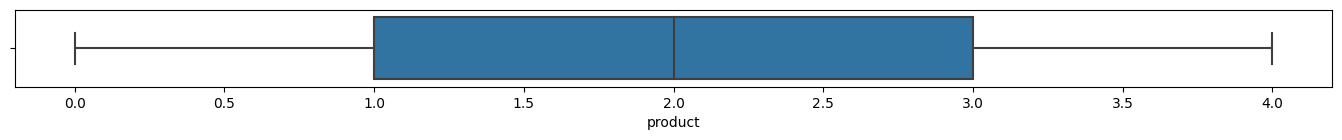

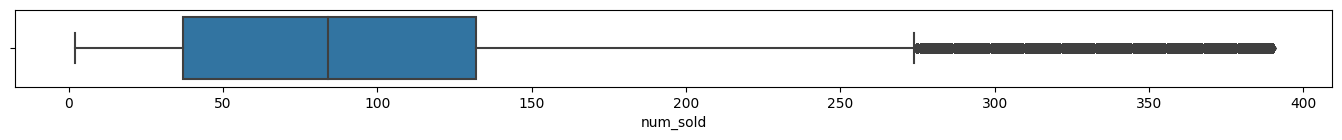

In [ ]:
import seaborn as sns
for i in train_d.corr([-1]:
  #sns.boxplot(train[i])
  plt.figure(figsize=(17,1))
  sns.boxplot(data=train_d, x=i)

In [ ]:
# Importing
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd

''' Detection '''
# IQR
# Calculate the upper and lower limits
#for i in li2:
i= 'num_sold'
Q1 = train_d[i].quantile(0.25)
Q3 = train_d[i].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(train_d[i]>=upper)[0]
lower_array = np.where(train_d[i]<=lower)[0]
# print(upper_array,lower_array,lower,upper,i)
# for i in upper_array:
#   print(train['SalePrice'].iloc[i])


# Removing the outliers
# for j in upper_array:
train_d.drop(train_d.index[upper_array],inplace=True)
train_d.drop(train_d.index[lower_array],inplace=True)

In [ ]:
from sklearn import preprocessing

string_object=[]
for idx,i in enumerate(train_d.dtypes):
  if i == 'object':
    string_object.append(train_d.columns[idx])

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
for str_obj in string_object:
  print(str_obj)
  train_d[str_obj]= label_encoder.fit_transform(train_d[str_obj])

country
store
product


In [ ]:
from sklearn import preprocessing

string_object1=[]
for idx,i in enumerate(test_d.dtypes):
  if i == 'object':
    string_object1.append(test_d.columns[idx])

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
for str_obj1 in string_object1:
  print(str_obj1)
  test_d[str_obj1]= label_encoder.fit_transform(test_d[str_obj1])

country
store
product


In [ ]:
train_d.head(25)

,country,store,product,num_sold
0,0,1,0,63
1,0,1,1,66
2,0,1,2,9
3,0,1,3,59
4,0,1,4,49
5,0,2,0,88
6,0,2,1,98
7,0,2,2,14
8,0,2,3,83
9,0,2,4,69


In [ ]:
test_d

,country,store,product
0,0,1,0
1,0,1,1
2,0,1,2
3,0,1,3
4,0,1,4
...,...,...,...
27370,4,0,0
27371,4,0,1
27372,4,0,2
27373,4,0,3


In [ ]:
# Find unique IDs
unique_ids = train_d['product'].unique()
count=0
# Print the unique IDs
for id in unique_ids:
    count=count+1
print(count)

5


In [ ]:
X=train_d.iloc[:,:-1]
X

,country,store,product
0,0,1,0
1,0,1,1
2,0,1,2
3,0,1,3
4,0,1,4
...,...,...,...
136941,4,2,1
136942,4,2,2
136943,4,2,3
136944,4,2,4


In [ ]:
y=train_d.iloc[:,-1:]
y

,num_sold
0,63
1,66
2,9
3,59
4,49
...,...
136941,192
136942,29
136943,175
136944,139


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=10 )

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
linear=LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [ ]:
linear.score(X_test,y_test)

0.16128915873778515

In [ ]:
linear.score(X_train,y_train)

0.3373831547157776

In [ ]:
y_test_linear=linear.predict(test_d)
y_test_linear

array([[161.90953671],
       [147.68977178],
       [133.47000685],
       ...,
       [322.962983  ],
       [308.74321807],
       [294.52345314]])

In [ ]:
np.array(test.iloc[:,:].values)

In [ ]:
data_save = pd.DataFrame({"id":test['id'],"num_sold":np.ravel(y_test_linear)})
data_save.to_csv("Mini_Course_Salesli.csv",index=False)

In [ ]:
# Import the necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest regressor object
rf_regressor = RandomForestRegressor(max_depth=10,n_estimators=1000)

# Train the Random Forest model
rf_regressor.fit(X_train, y_train)

<ipython-input-120-e83a8787cc04>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, n_estimators=1000)

In [ ]:
rf_regressor.score(X_test,y_test)

0.9476022511031336

In [ ]:
rf_regressor.score(X_train,y_train)

0.948349664612266

In [ ]:
y_test_reg=rf_regressor.predict(test_d)
y_test_reg

array([ 29.95898474,  29.5251327 ,   4.22419893, ...,  68.28991295,
       370.28704164, 336.71533315])

In [ ]:
data_save = pd.DataFrame({"id":test['id'],"num_sold":np.ravel(y_test_reg)})
data_save.to_csv("Mini_Course_Salesreg1.csv",index=False)

# **XGBoost**

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor(n_estimators=10000, max_depth = 10)


In [ ]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
xgb.score(X_test,y_test)

0.9476015747292301

In [ ]:
xgb.score(X_train,y_train)

0.9483496977063847